## Call the import statements

The following code imports the necessary modules.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

## Load the datasets from the csv file

The following code cell loads the separate .csv files and creates the pandas DataFrame.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Job2023/Interview 2023/ClearStrategy_interview/yds_data.csv")
#data = pd.read_csv("/content/yds_data.csv")

print('Size of data: ' , data.shape)

Size of data:  (30697, 28)


In [127]:
data.head(10)

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,opponent,remaining_time,goal_result,lat,lng,angles
1,12.0,-157.0,0.00000,10.0,1.0,0,2000-01,22.0,35.0,0,...,"45.539131, -122.651648",shot - 45,shot - 3,20000012,POR,622.0,no goal,45.539131,-122.651648,0.000000
2,35.0,-101.0,135.00000,7.0,1.0,0,2000-01,45.0,36.0,1,...,"45.539131, -122.651648",shot - 25,shot - 3,20000012,POR,465.0,goal,45.539131,-122.651648,53.198069
3,43.0,138.0,175.00000,6.0,1.0,0,2000-01,52.0,42.0,0,...,"45.539131, -122.651648",shot - 25,shot - 3,20000012,POR,412.0,no goal,45.539131,-122.651648,51.741697
4,155.0,0.0,0.00000,6.0,2.0,0,2000-01,19.0,20.0,1,...,"45.539131, -122.651648",shot - 25,shot - 1,20000012,POR,379.0,goal,45.539131,-122.651648,0.000000
5,244.0,-145.0,-11.00000,9.0,3.0,0,2000-01,32.0,34.0,0,...,"45.539131, -122.651648",shot - 17,shot - 3,20000012,POR,572.0,no goal,45.539131,-122.651648,4.338267
6,251.0,0.0,0.00000,8.0,3.0,0,2000-01,52.0,20.0,1,...,"45.539131, -122.651648",shot - 17,shot - 4,20000012,POR,532.0,goal,45.539131,-122.651648,0.000000
8,265.0,-65.0,91.46118,6.0,3.0,0,2000-01,12.0,32.0,1,...,"45.539131, -122.651648",shot - 36,shot - 3,20000012,POR,372.0,goal,45.539131,-122.651648,54.599200
9,294.0,-33.0,91.46118,3.0,3.0,0,2000-01,36.0,32.0,0,...,"45.539131, -122.651648",shot - 44,shot - 3,20000012,POR,216.0,no goal,45.539131,-122.651648,70.160109
10,309.0,-94.0,238.00000,1.0,3.0,0,2000-01,56.0,45.0,0,...,"45.539131, -122.651648",shot - 7,shot - 3,20000012,POR,116.0,no goal,45.539131,-122.651648,68.448063
11,4.0,121.0,127.00000,11.0,1.0,0,2000-01,0.0,37.0,1,...,"42.982923, -71.446094",shot - 7,shot - 3,20000019,UTA,660.0,goal,42.982923,-71.446094,46.385918


What is in the dataset?

In [6]:
print('Features in the dataset: ')
for col in data.columns:
      print(col)


Features in the dataset: 
Unnamed: 0
match_event_id
location_x
location_y
remaining_min
power_of_shot
knockout_match
game_season
remaining_sec
distance_of_shot
is_goal
area_of_shot
shot_basics
range_of_shot
team_name
date_of_game
home/away
shot_id_number
lat/lng
type_of_shot
type_of_combined_shot
match_id
team_id
remaining_min.1
power_of_shot.1
knockout_match.1
remaining_sec.1
distance_of_shot.1


In [7]:
# Percentage and Sum of Missing values in each Columns
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/data.shape[0])*100})
missing_data

,total_missing,perc_missing
Unnamed: 0,0,0.000000
match_event_id,1563,5.091703
location_x,1461,4.759423
location_y,1540,5.016777
remaining_min,1562,5.088445
power_of_shot,1486,4.840864
knockout_match,1517,4.941851
game_season,5862,19.096329
remaining_sec,1594,5.192690
distance_of_shot,1567,5.104733


Drop some columns...

In [8]:
f_drop = ['Unnamed: 0','remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1','team_name', 'team_id',
       'distance_of_shot.1']
for f in f_drop:
  data.drop(f,axis=1,inplace=True)


Fix up the nans...

In [9]:
# drop any data that has a NaN in the is_goal feature - is_goal is our target variable
data.dropna(subset = ['is_goal'],inplace=True)
#data['game_season'].fillna(data['game_season'].mode()[0], inplace = True)

# filling the missing values
data['match_event_id'].fillna(data['match_event_id'].mean(), inplace = True)
data['location_x'].fillna(data['location_x'].mean(), inplace = True)
data['location_y'].fillna(data['location_y'].mean(), inplace = True)
data['remaining_min'].fillna(method='ffill', inplace = True)
data['power_of_shot'].fillna(method='ffill', inplace = True)
data['knockout_match'].fillna(data['knockout_match'].mean(), inplace = True)
data['game_season'].fillna(method='ffill', inplace = True)
data['remaining_sec'].fillna(method='ffill', inplace = True)
data['distance_of_shot'].fillna(data['distance_of_shot'].mean(), inplace = True)
data['area_of_shot'].fillna(method='ffill', inplace = True)
data['shot_basics'].fillna(data['shot_basics'].mode()[0], inplace = True)
data['range_of_shot'].fillna(method='ffill', inplace = True)
data['home/away'].fillna(method='ffill', inplace = True)
data['date_of_game'].fillna(method='ffill', inplace = True)
data['shot_id_number'].interpolate(method = 'linear', inplace = True)
data['type_of_shot'].fillna(method='ffill', inplace = True)
data['type_of_combined_shot'].fillna(data['type_of_combined_shot'].mode()[0], inplace = True)
data['lat/lng'].fillna(data['lat/lng'].mode()[0], inplace = True)

print('Checking for NaNs in data:')
data.isnull().sum()

Checking for NaNs in data:


match_event_id           0
location_x               0
location_y               0
remaining_min            0
power_of_shot            0
knockout_match           0
game_season              0
remaining_sec            0
distance_of_shot         0
is_goal                  0
area_of_shot             0
shot_basics              0
range_of_shot            0
date_of_game             0
home/away                0
shot_id_number           0
lat/lng                  0
type_of_shot             0
type_of_combined_shot    0
match_id                 0
dtype: int64

## Data Cleaning
Let us reduce the number of uniformative features by combining features or dropping them.

In [10]:
# Extract the opponents - could there be a trend here?
data['opponent'] = (data['home/away'].str.rsplit('@').str[-1])
data['opponent'] = (data['opponent'].str.rsplit('vs.').str[-1])
data['opponent'].unique()

array([' POR', ' UTA', ' VAN', ' LAC', ' HOU', ' SAS', ' DEN', ' SAC',
       ' CHI', ' GSW', ' MIN', ' IND', ' SEA', ' DAL', ' PHI', ' DET',
       ' MIL', ' TOR', ' MIA', ' PHX', ' CLE', ' NJN', ' NYK', ' CHH',
       ' WAS', ' ORL', ' ATL', ' MEM', ' BOS', ' NOH', ' UTH', ' SAN',
       ' NOK', ' PHO', ' CHA', ' OKC', ' BKN', ' NOP'], dtype=object)

In [11]:
# Combime time features
data['remaining_time'] = data['remaining_sec'] + 60*data['remaining_min']

In [12]:

data = data.astype({'knockout_match':'int','is_goal': 'int'})

In [13]:
data['goal_result'] = np.where(data['is_goal'] == 0, 'no goal', 'goal')    

## Correlation between features

In [14]:
import plotly.figure_factory as ff
corrs = data.corr()

fig_heatmap = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
fig_heatmap.update_layout(title= 'Correlation of whole Data',  
                          plot_bgcolor='white', paper_bgcolor='white',
                          title_font=dict(size=20, color='black', family="Muli, sans-serif"),
                          font=dict(size=12,color='#8a8d93'))

Features like matchid and shotid appear correlated. But to get a better idea of the most informative features lets clean the data up. Some duplicate and noninofrmative features can be removed. For example There seems to be duplicate data at the end of the data.

##Exploratory Data Analysis

Looking at the player performance over the years. 


In [15]:
fig = px.histogram(data, x='date_of_game',
                    title='Scoring history',
                   color="goal_result",color_discrete_map = {'goal':'blue','no goal':'red'},text_auto=True)
fig.update_layout(bargap=0.2)
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Counts')
fig.update_layout(
    title_text='Scoring History',
    showlegend = True,
    legend_title="Goal Result",
    legend_traceorder="reversed"
    )
fig.show()

Compare successful and unsuccessful shots


## Percentage of successful goals

In [55]:
#seperate data
goal_data = data[data.is_goal == 1]
notgoal_data = data[data.is_goal != 1]

In [96]:
sea_goal_df = goal_data.groupby('game_season').size().reset_index(name='goal_counts')
sea_notgoal_df = notgoal_data.groupby('game_season').size().reset_index(name='not_goal_counts')
mergedRes = pd.merge(sea_goal_df, sea_notgoal_df, on ='game_season')
mergedRes['total_attempts'] = mergedRes.goal_counts + mergedRes.not_goal_counts
mergedRes['pct_goal'] = (mergedRes.goal_counts/mergedRes['total_attempts'])*100.
mergedRes['pct_goal'] = mergedRes['pct_goal'].round(decimals = 0)
mergedRes['pct_not_goal'] = (mergedRes.not_goal_counts/mergedRes['total_attempts'])*100


In [100]:
fig = px.line(mergedRes,x='game_season',y='pct_goal', markers=True, text = 'pct_goal')
#fig.add_scatter(mergedRes,x='game_season',y='not_goal_counts',cliponaxis=True)
fig.update_layout(title_text='Percentage of successful goals per season',legend_title="Goal Result")
fig.update_xaxes(title_text='Game Season', range=[mergedRes.game_season.min(),mergedRes.game_season.max()])
fig.update_yaxes(title_text='Percentage %')
fig.update_xaxes(type='category', tickvals=mergedRes.game_season.tolist())
fig.update_traces(textposition="bottom right")
fig.show()


##,hover_name='game_season',markers=True,text='goal_counts')


## Number of goals per season

In [19]:
sea_goals_df = goal_data.groupby('game_season').size().reset_index(name='counts')
fig = px.line(sea_goals_df,x='game_season',y='counts',hover_name='game_season',markers=True,text='counts')
fig.update_layout(title_text='Number of Goals in each Season')
fig.update_xaxes(title_text='Game Season')
fig.update_yaxes(title_text='Number of Goals')
fig.show()

## Timing of goal

In [20]:
# Timing of the goal ?
fig = px.histogram(data, x='remaining_time', color='goal_result',color_discrete_map = {'goal':'blue','no goal':'red'},text_auto=True)
fig.update_xaxes(title_text='Remaining Time (Sec)')
fig.update_yaxes(title_text='Number of Goals')
fig.update_layout(
    title_text='Performance by match time',
    showlegend = True,
    legend_title="Goal Result",
    legend_traceorder="reversed"
    )
fig.update_layout(bargap=0.2)
fig.show()

## Goals by opponent

In [21]:
# Goals per opponent

fig = px.histogram(data, x='opponent', color='goal_result',color_discrete_map = {'goal':'blue','no goal':'red'},text_auto=True)
fig.update_layout(
    title_text='Performance by opponents',
    showlegend = True,
    legend_title="Goal Result",
    legend_traceorder="reversed"
    )
fig.show()

## Success by power of shot

In [103]:
power_goal_df = goal_data.groupby('power_of_shot').size().reset_index(name='goal_counts')
power_notgoal_df = notgoal_data.groupby('power_of_shot').size().reset_index(name='not_goal_counts')
mergedRes = pd.merge(power_goal_df, power_notgoal_df , on ='power_of_shot')
mergedRes['total_attempts'] = mergedRes.goal_counts + mergedRes.not_goal_counts

mergedRes['pct_goal'] = (mergedRes.goal_counts/mergedRes['total_attempts'])*100.
mergedRes['pct_goal'] = mergedRes['pct_goal'].round(decimals = 0)
mergedRes['pct_not_goal'] = (mergedRes.not_goal_counts/mergedRes['total_attempts'])*100


In [123]:
fig = px.histogram(mergedRes, x='power_of_shot',y = 'pct_goal',nbins=7, text_auto=True)
fig.update_layout(bargap=0.2)
fig.update_xaxes(title_text='Power of shot')
fig.update_yaxes(title_text='Percentage %',range=[0,60])
fig.update_layout(
    title_text='Success by power of shot',
    showlegend = True,
    legend_title="Power of shot"
    )
fig.show()



#Success by region on pitch

In [124]:
power_goal_df = goal_data.groupby('area_of_shot').size().reset_index(name='goal_counts')
power_notgoal_df = notgoal_data.groupby('area_of_shot').size().reset_index(name='not_goal_counts')
mergedRes = pd.merge(power_goal_df, power_notgoal_df , on ='area_of_shot')
mergedRes['total_attempts'] = mergedRes.goal_counts + mergedRes.not_goal_counts

mergedRes['pct_goal'] = (mergedRes.goal_counts/mergedRes['total_attempts'])*100.
mergedRes['pct_goal'] = mergedRes['pct_goal'].round(decimals = 0)
mergedRes['pct_not_goal'] = (mergedRes.not_goal_counts/mergedRes['total_attempts'])*100


In [126]:
fig = px.histogram(mergedRes, x='area_of_shot',y = 'pct_goal',nbins=7, text_auto=True)
fig.update_layout(bargap=0.2)
fig.update_xaxes(title_text='Area of shot')
fig.update_yaxes(title_text='Percentage %',range=[0,60])
fig.update_layout(
    title_text='Success by area of shot',
    showlegend = True,
    )
fig.show()



By region 

In [23]:
fig = px.histogram(data, x='goal_result',color ='area_of_shot',text_auto=True)
fig.update_layout(bargap=0.2)
fig.update_xaxes(title_text='Goal Result')
fig.update_yaxes(title_text='Counts')
fig.update_layout(
    title_text='Success by region on pitch',
    showlegend = True,
    legend_title="Area of shot"
    )
fig.show()

# Location of shot
Exploring the location of the shots. The location data appears to be stored in 2 ways namely (1) as latitude and longitude and (2) as x and y components.

In [24]:
# seperate latitude and longitude
#data = data.dropna(subset = ['lat/lng']) # drop rows with Nan
data['lat'] = (data['lat/lng'].str.rsplit(',').str[0]).astype(float) 
data['lng'] = (data['lat/lng'].str.rsplit(',').str[-1]).astype(float)

Text(0.5, 1.0, 'loc x and loc y')

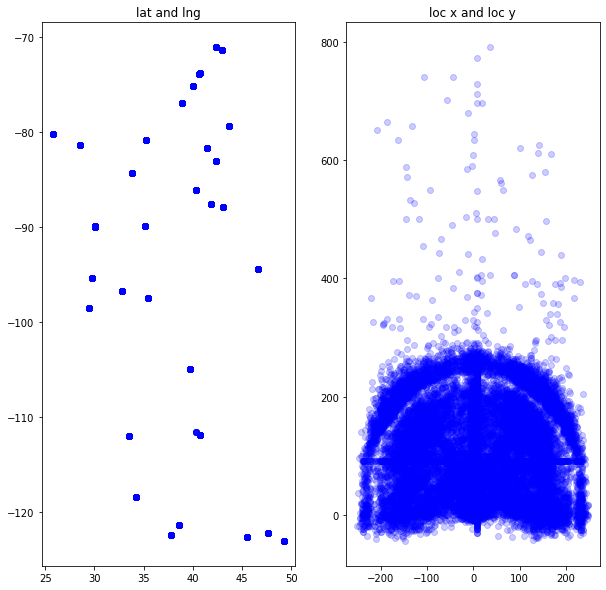

In [25]:
import matplotlib.pyplot as plt
alpha = 0.2
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.scatter(data['lat'],data['lng'], color='blue',alpha=alpha)
plt.title('lat and lng')

plt.subplot(122)
plt.scatter(data['location_x'],data['location_y'], color='blue',alpha=alpha)
plt.title('loc x and loc y')


We will just work with locx and locy as we can see the shape of the football pitch.



In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(x=goal_data['location_x'],y=goal_data['location_y'],name="Goal", mode="markers",opacity = 0.7),
    row=1, col=1)

fig.add_trace(go.Scatter(x=notgoal_data['location_x'],y=notgoal_data['location_y'],name="No Goal", mode="markers",opacity = 0.7),
    row=1, col=2)

fig.update_layout(height=600, width=800, title_text="Goals Vs No Goals")
fig.update_yaxes(title_text="y",range=[0,800] ,row=1, col=1)
fig.update_yaxes(title_text="y", range=[0,800], row=1, col=2)
# Update xaxis properties
fig.update_xaxes(title_text="x", row=1, col=1)
fig.update_xaxes(title_text="x",  row=1, col=2)
fig.show()

In [27]:
# group into loc x and loc y. First step lets bin 
step = 0.5
to_bin = lambda x: np.floor(x / step) * step
goal_data["xBin"] = to_bin(goal_data.location_x)
goal_data["yBin"] = to_bin(goal_data.location_y)

dfg = goal_data.groupby(["xBin", "yBin"]).size().to_frame(name = 'counts').reset_index()


In [28]:
fig = px.density_contour(dfg, x="xBin", y="yBin",z='counts')
fig.update_traces(
contours_showlabels = True,
contours_coloring="fill",colorscale = 'Blues',
colorbar=dict(
    title='Number Count', 
    titleside='right',
    titlefont=dict(
    size=14,
    family='Arial, sans-serif')))
fig.update_xaxes(title_text='x')
fig.update_yaxes(title_text='y')
fig.update_layout(
    #yaxis=dict(range=[-1.75, 1.5]),
    height = 800,
    width =800,
    bargap = 0,
    yaxis_range = [0,400],
    title_text='Density of scoring',
    showlegend = True
    )
fig.show()

In [29]:
# group into loc x and loc y. First step lets bin 
step = 0.5
to_bin = lambda x: np.floor(x / step) * step
notgoal_data["xBin"] = to_bin(notgoal_data.location_x)
notgoal_data["yBin"] = to_bin(notgoal_data.location_y)

dfng = notgoal_data.groupby(["xBin", "yBin"]).size().to_frame(name = 'counts').reset_index()


In [30]:
fig = px.density_contour(dfng, x="xBin", y="yBin",z='counts')
fig.update_traces(
contours_showlabels = True,
contours_coloring="fill",colorscale = 'Reds',
colorbar=dict(
    title='Number Count', 
    titleside='right',
    titlefont=dict(
    size=14,
    family='Arial, sans-serif')))
fig.update_xaxes(title_text='x')
fig.update_yaxes(title_text='y')
fig.update_layout(
    #yaxis=dict(range=[-1.75, 1.5]),
    height = 800,
    width =800,
    bargap = 0,
    yaxis_range = [0,400],
    title_text='Density of not scoring',
    showlegend = True
    )
fig.show()

## Explore location and power of shot

In [31]:
fig = px.scatter(data[:1000], x="location_x",y='location_y', size="power_of_shot",  color="goal_result",color_discrete_map = {'goal':'blue','no goal':'red'})
fig.update_xaxes(title_text='x')
fig.update_yaxes(title_text='y')
fig.update_layout(
    #yaxis=dict(range=[-1.75, 1.5]),
    height = 800,
    width =800,
    bargap = 0,
    yaxis_range = [0,800],
    title_text='Scoring location and power of shot',
    showlegend = True,legend_traceorder="reversed"
    )

fig.show()

In [32]:
fig = px.scatter(goal_data, x="location_x",y='location_y', size="power_of_shot")
fig.update_xaxes(title_text='x')
fig.update_yaxes(title_text='y')
fig.update_layout(
    #yaxis=dict(range=[-1.75, 1.5]),
    height = 800,
    width =800,
    bargap = 0,
    yaxis_range = [0,800],
    title_text='Scoring location and power of shot',
    showlegend = True,legend_traceorder="reversed"
    )

fig.show()

In [33]:
fig = px.scatter(notgoal_data, x="location_x",y='location_y', size="power_of_shot")
fig.update_xaxes(title_text='x')
fig.update_yaxes(title_text='y')
fig.update_layout(
    #yaxis=dict(range=[-1.75, 1.5]),
    height = 800,
    width =800,
    bargap = 0,
    yaxis_range = [0,800],
    title_text='Scoring location and power of shot',
    showlegend = True,legend_traceorder="reversed"
    
    )
fig.update_traces(marker=dict(
        color='red'))
fig.show()

Calculate angle -  might not use

In [35]:
 import math 
 x= list(data.location_x.values)
 y = list(data.location_y.values)
 angles = []
 for y_ , x_ in zip(y,x):
  angle = math.atan2(abs(y_),abs(x_))/math.pi*180
  angles.append(angle)

In [36]:
data['angles'] = angles
data['angles'].unique()

array([ 0.        , 53.19806885, 51.74169729, ..., 41.50740684,
       51.08852815, 83.3773334 ])

##Goal prediction model

What features are we going to put into the model?

In [37]:
# Change text based label for output label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# ml data set
features = ['angles','power_of_shot','distance_of_shot','remaining_time','location_x','location_y','opponent','is_goal'] #'location_x','location_y'
data_ml = data[features]


Now we have cleaned the data and completed some EDA. The next step is to split the data into a train and test dataset.

In [38]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_ml)
print(train.shape)
print(test.shape)
train.head()

(18321, 8)
(6108, 8)


,angles,power_of_shot,distance_of_shot,remaining_time,location_x,location_y,opponent,is_goal
7239,74.690727,4.0,38.000000,423.0,-49.000000,179.0,IND,0
28837,87.061587,4.0,33.467159,69.0,7.494178,146.0,DEN,1
13282,0.000000,1.0,20.000000,322.0,0.000000,0.0,DET,1
13674,41.009087,4.0,29.000000,304.0,69.000000,60.0,ORL,0
23795,55.514209,2.0,45.000000,257.0,147.000000,214.0,SEA,0


In [135]:
features = ['location_x','location_y','remaining_time','distance_of_shot','power_of_shot'] #'location_x','location_y'
#training data
train_X=train[features]
train_y=train.is_goal
#test data
test_X=test[features]
test_y=test.is_goal

In [129]:
# standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.fit_transform(test_X)

#Logistic Regression Algo

In [130]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
Lr.fit(train_X,train_y) #logistic regression
y_pred = Lr.predict(test_X)

In [131]:
print(Lr.score(test_X,test_y))

0.5790766208251473


In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, y_pred)*100

57.90766208251473

In [133]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,y_pred)

array([[2543,  856],
       [1715,  994]])

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

def norm_score(model):
    return (accuracy_score(train_y,model.predict(train_X)))

def acc_score(model):
    return np.mean(cross_val_score(model,train_X,train_y,cv=k_fold,scoring="accuracy"))


In [47]:
print("Logistic Regression Accuracy (without cross validation): "+str(norm_score(Lr)))
print("Logistic Regression Cross Validation Accuracy: "+str(acc_score(Lr)))

Logistic Regression Accuracy (without cross validation): 0.5953823481251024
Logistic Regression Cross Validation Accuracy: 0.5949457662409442


Random test:

In [48]:
loc_x = 10
loc_y = 12
remaining_time = 20
distance = 32
power_of_shot = 3
custom_input=[[loc_x,loc_y,remaining_time,power_of_shot,distance]]

print(Lr.predict(custom_input))


[0]


#Random Forest Classifer

In [49]:
# dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
train_X = pca.fit_transform(train_X)
test_X = pca.transform(test_X)


In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth = 10, min_samples_leaf = 5)
model.fit(train_X, train_y)

y_pred = model.predict_proba(test_X)
print(model.score(test_X,test_y))

0.6005239030779306
